# Day 2 - Supervised learning practical tasks
***
These tasks cover linear regression, logistic regression, decision trees, model evaluation and regularization.

## Regression models

You will use [Advertising](https://www.kaggle.com/purbar/advertising-data) Dataset. The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
#### Your task will be to:
1. Write evaluation functions (MAE, MSE, SSE, RMSE, MAPE, R2).
2. Analyze the correlation matrix.
3. Predict sales values using linear regression.
4. Evaluate model with written statistical explanatory variables.
5. Perform cross-validation (k-fold).
6. Compare your regression model to a reduced model by removing one of the features.
7. Compare your regression model to regularization models.

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

In [3]:
import pandas as pd
import numpy as np


# Data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 1. Create statistical evaluation functions for regression models

#### 1.1 Create a function that calculates mean absolute error (MAE)

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i\right|
\end{equation}

In [15]:
data = pd.read_csv('advertising.csv')

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Generate predictions
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


MAE = (abs(y_test - y_pred)).mean()
print(MAE)


1.3617813502090272


#### 1.2 Create a function that calculates mean squared error (MSE)

\begin{equation}
MSE = \frac{1}{n}\cdot SSE
\end{equation}

\begin{equation}
SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}

In [ ]:
SSE = ((y_test - y_pred)**2).sum()
MSE = SSE / len(y_test)
print(SSE)
print(MSE)

176.08473165798722
4.40211829144968
MSE score: 4.40211829144968


#### 1.3 Create a function that calculates root mean squared error (RMSE)

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}

In [28]:
RMSE = np.sqrt(MSE)
print(RMSE)

2.098122563495679


#### 1.4 Create a function that calculates mean absolute percentage error (MAPE)

\begin{equation}
MAPE = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

In [31]:
absolute_error = abs((y_test - y_pred)/y_test)
MAPE = absolute_error.mean() * 100
print(MAPE)

24.6108506100056


#### 1.5 Create a function that calculates coefficient of determination $R^2$ using formula

\begin{equation}
R^2 = \frac{SST-SSE}{SST}
\end{equation}

\begin{equation}
SST = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation}


In [ ]:
SST = ((y_test - y_test.mean())**2).sum()
r2 = (SST - SSE) / SST
print(r2)


0.8601145185017869


### 2 Use Linear regression model to make predictions and evaluate it with above developed functions. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling - split the data in target variable and features.

In [35]:
data = pd.read_csv('advertising.csv')

In [36]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [37]:
print(X.head())
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

In [ ]:
print(data.corr())

# TV and Sales is the strongest relationship. (0.78)
# Radio and Sales is a positive correlation (0.58)
# Newpaper and Sales is weakest relationshipo (0.23)

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


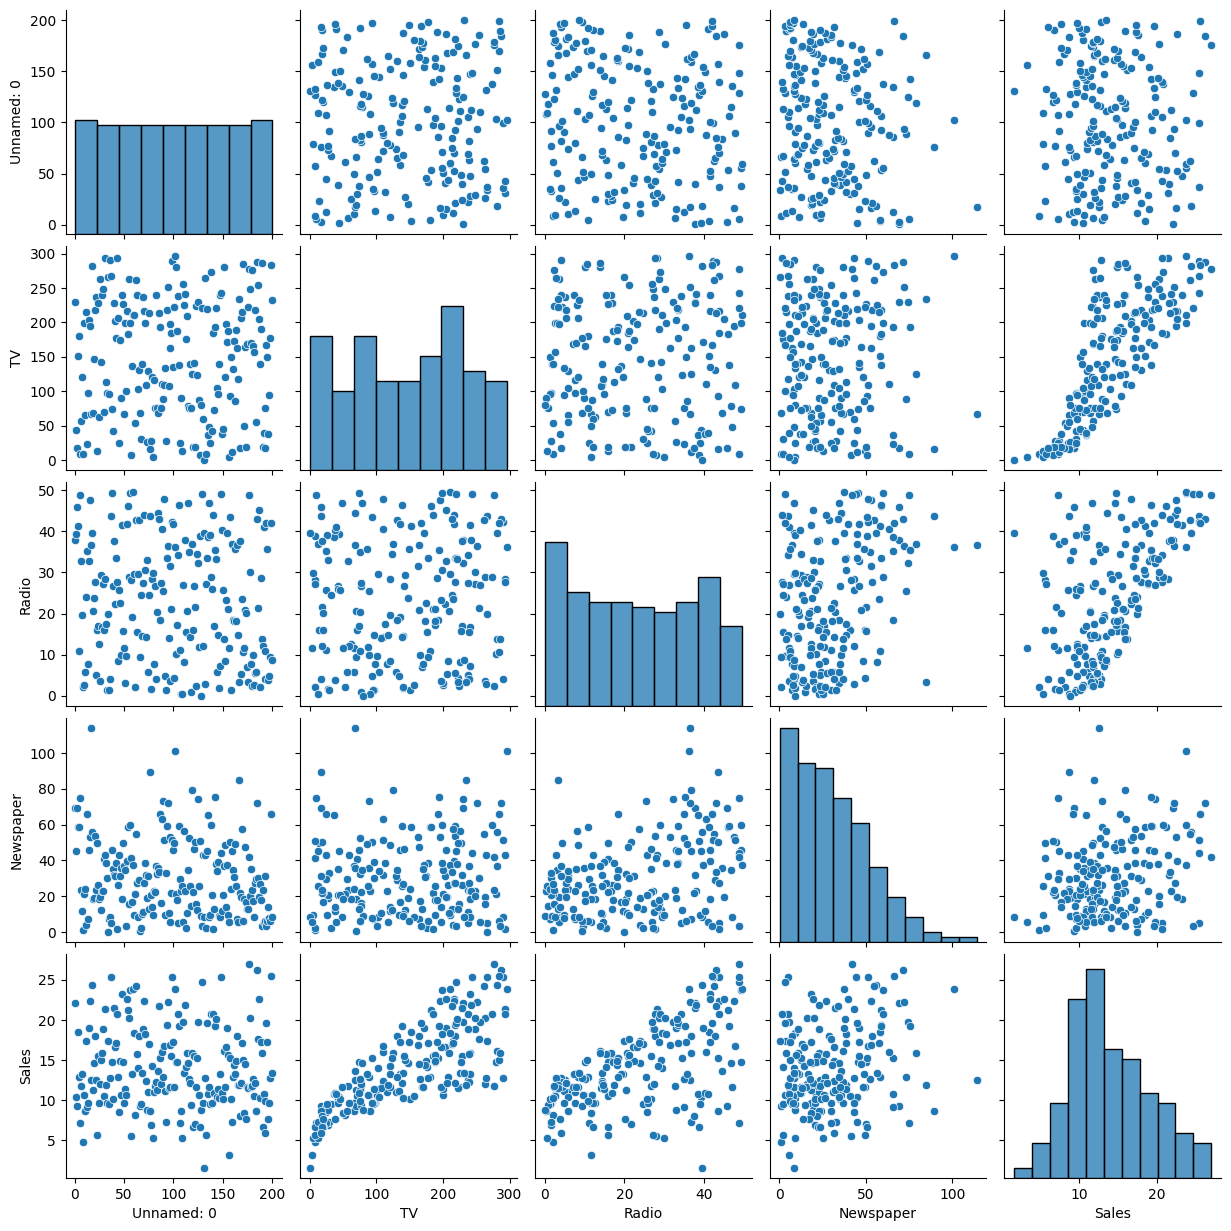

In [78]:
sns.pairplot(data)


#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.33, random_state=17)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

print(X_train_scaled.shape)
print(X_holdout_scaled.shape)

(134, 3)
(66, 3)


#### 2.4 Fit linear regression model, generate predictions and print regression coefficients $b_0$ and $b_1$.

In [48]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_holdout_scaled)

print(model.intercept_)
print(model.coef_)

14.022388059701495
[ 3.9675339   2.88155345 -0.07344038]


#### 2.5 Evaluate created model with above functions

In [51]:
print(MAE)
print(RMSE)
print(r2)

1.3617813502090272
2.098122563495679
0.8601145185017869


#### 2.6 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Please use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [r2](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) score.

In [56]:
from sklearn.model_selection import cross_val_score

X_scaled = scaler.fit_transform(X)
cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='r2')

print(cv_scores)
print(cv_scores.mean())


[0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
0.8853562237979616


#### 2.7. Drop one of the three variables (TV, Radio or Newspaper) and create another model, evaluate it and compare to the first model.

In [59]:
X_simple = data[['TV', 'Radio']]

X_simple_scaled = scaler.fit_transform(X_simple)
cv_scores_simple = cross_val_score(LinearRegression(), X_simple_scaled, y, cv=10, scoring='r2')

print(cv_scores.mean())
print(cv_scores_simple.mean())

0.8853562237979616
0.8869670516810129


### 3. Use regularization models with regularization strength `alpha=1` and compare $MSE$ values with previous models.

#### 3.1 Lasso regression

In [60]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


#### 3.2 Ridge regression

In [ ]:
from sklearn.linear_model import Lasso

y_pred_lasso = lasso_model.predict(X_holdout_scaled)
mean_squared_error(y_holdout, y_pred_lasso)

4.911579294712751

#### 3.3 Elastic net regression

Use any `l1_ratio` of your choice.


In [67]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

y_pred_en = elastic_net.predict(X_holdout_scaled)
mse_en = mean_squared_error(y_holdout, y_pred_en)

print(elastic_net.coef_)
print(mse_en)

[2.39397459 1.68907463 0.01489489]
6.8438833201041085


#### 3.4 Make conclusions

## Classification models

You will use [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset. The dataset includes data from 768 women with several medical predictor variables and one target variable. The classification goal is to predict whether or not the patients in the dataset have diabetes or not.
#### Your task will be to:
1. Write evaluation functions (Accuracy, Precision, Recall, F1).
2. Predict whether or not a patient has diabetes using Logistic regression and Decision Tree Classification models
3. Evaluate both models with written statistical explanatory variables
4. Draw ROC curve and compute AUC
5. Perform cross-validation (k-fold)
6. Analyze the results

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

### 1. Write statistical evaluation functions for classification models

#### 1.1 Create a function that calculates accuracy

\begin{equation}
Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}
\end{equation}

In [ ]:
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

#### 1.2 Create a function that calculates precision

\begin{equation}
Precision = \frac{True Positive}{True Positive + False Positive}
\end{equation}

In [74]:
def calculate_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    
    if (tp + fp) == 0:
        return 0
    return tp / (tp + fp)

#### 1.3  Create a function that calculates recall

\begin{equation}
Recall = \frac{True Positive}{True Positive + False Negative}
\end{equation}

In [72]:
def calculate_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    if (tp + fn) == 0:
        return 0
    return tp / (tp + fn)


#### 1.4 Create a function that calculates $F1$ - score

\begin{equation}
F1 = 2\cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}

In [73]:
def calculate_f1(y_true, y_pred):
    p = calculate_precision(y_true, y_pred)
    r = calculate_recall(y_true, y_pred)
    if (p + r) == 0:
        return 0
    return 2 * (p * r) / (p + r)

### 2. Use logistic regression to make prediction and evaluate it with above developed functions. Compute ROC and compute AUC. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling. Split the data in target variable and features.

Prepare dataset to use it for modelling (you should also replace 0 values in columns `Glucose`, `BloodPressure`,`SkinThickness`,`Insulin`,`BMI` with mean values).

In [ ]:
import pandas as pd

diabetes_data = pd.read_csv('diabetes.csv')

cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fix:
    diabetes_data[col] = diabetes_data[col].replace(0, np.nan)
    diabetes_data[col] = diabetes_data[col].fillna(diabetes_data[col].mean())

X_clf = diabetes_data.drop('Outcome', axis=1)
y_clf = diabetes_data['Outcome']



Data preparation complete. Missing values handled.


#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64


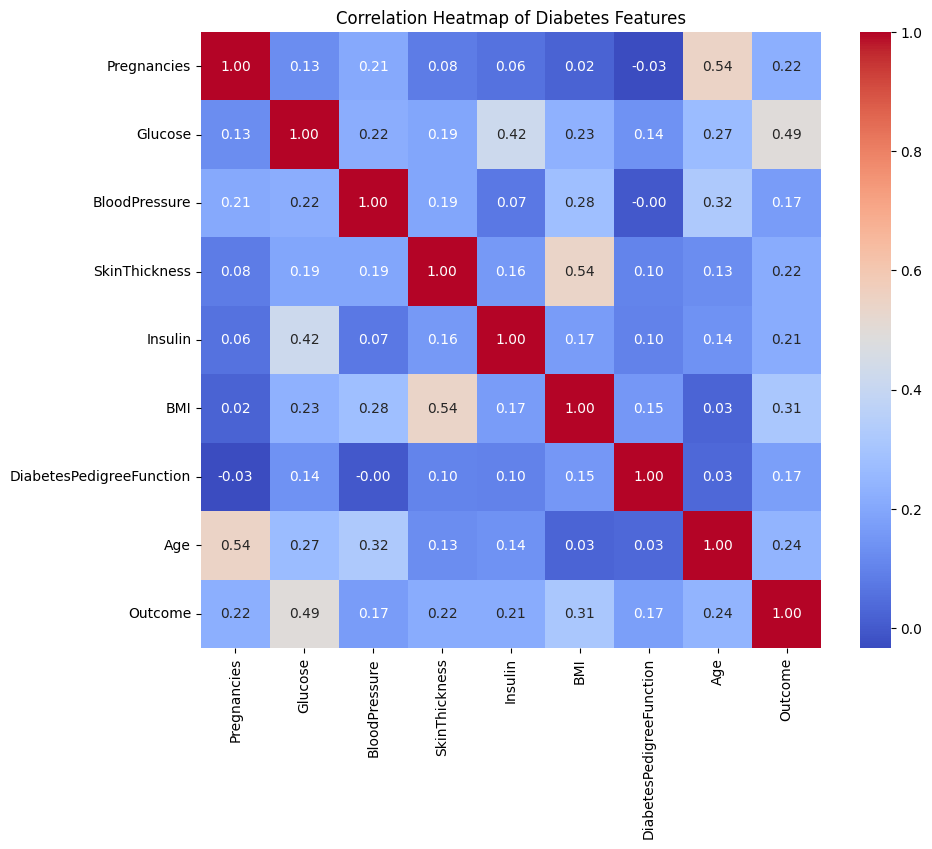

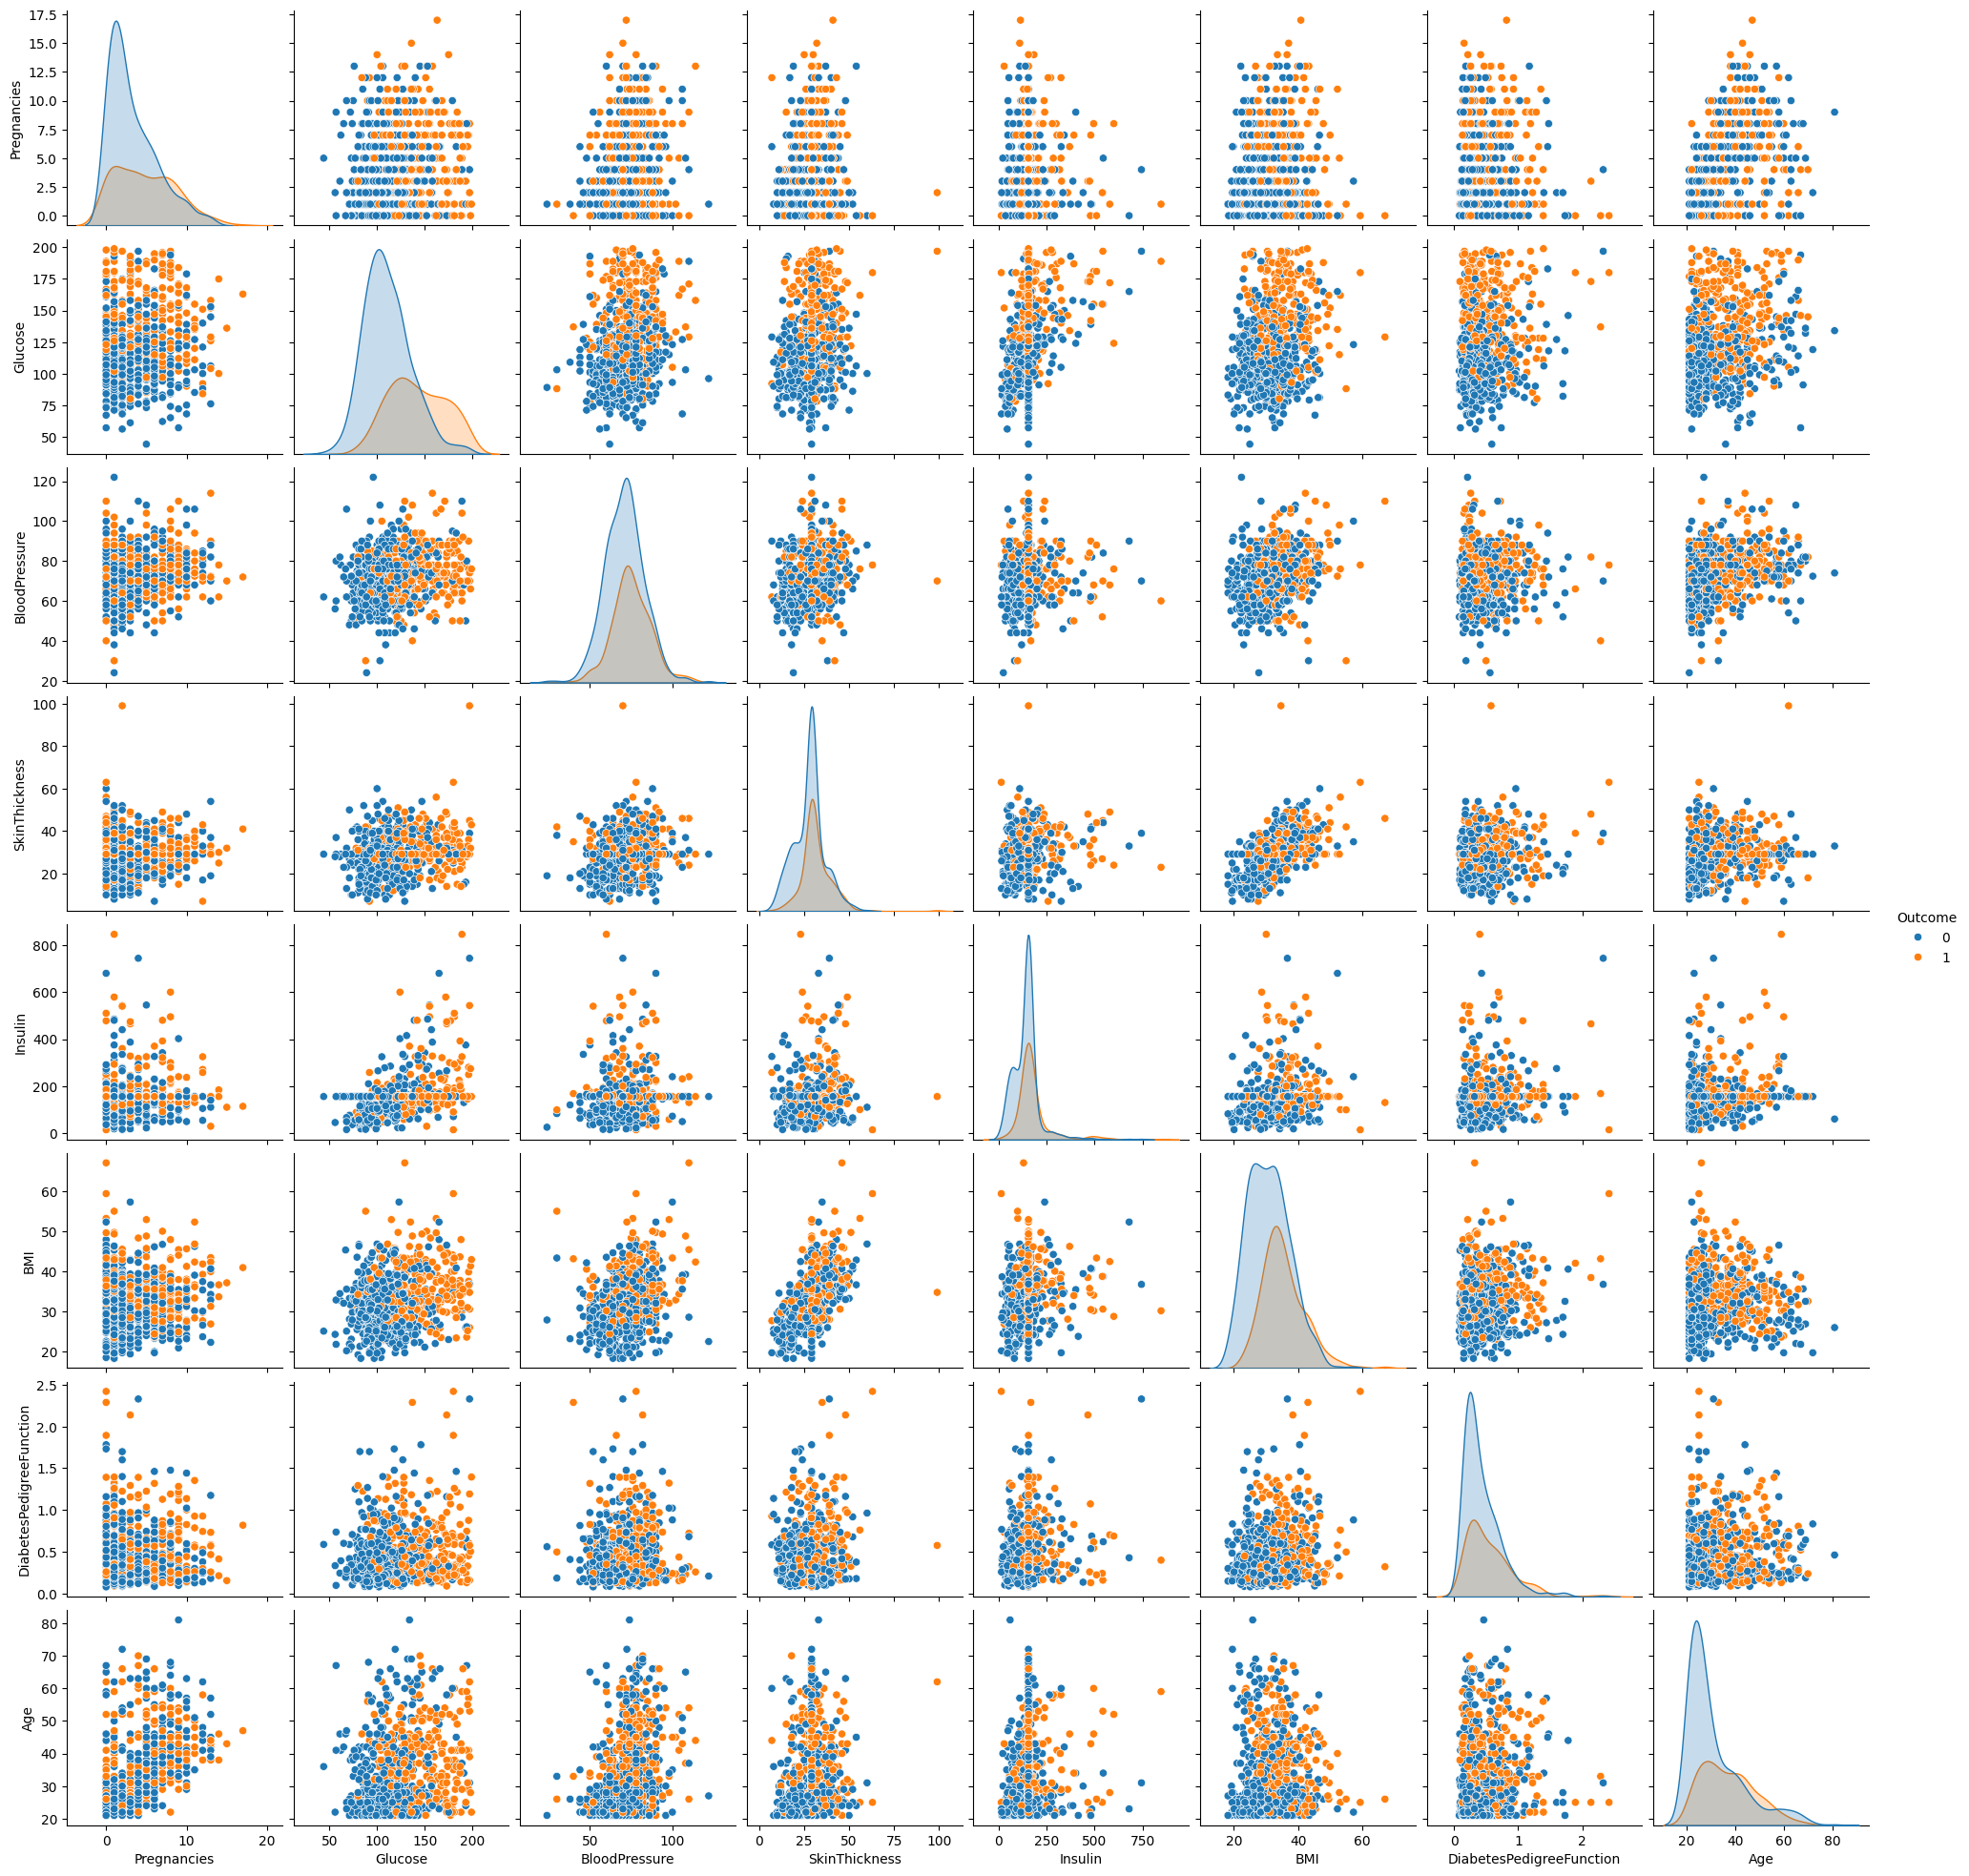

In [77]:
correlation_matrix = diabetes_data.corr()
print(correlation_matrix['Outcome'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Diabetes Features")

sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')


#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [81]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.33, random_state=17)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

print(len(X_train_scaled))
print(len(X_holdout_scaled))

134
66


#### 2.4 Fit logistic regression model, generate predictions

In [87]:

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.33, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

#### 2.5 Create a confusion matrix and evaluate created model with above functions

In [95]:
X_diabetes = diabetes_data.drop('Outcome', axis=1)
y_diabetes = diabetes_data['Outcome']

X_train, X_holdout, y_train, y_holdout = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_holdout_scaled)

cm = confusion_matrix(y_holdout, y_pred)


#### 2.6 Draw a ROC curve and compute Area Under the Curve (AUC)

You can use [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) and [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).
Check documentation for examples.
For roc_auc_score use predicted probabilities (`predict_proba`), not predicted values. This will align your AUC and ROC curve values.

`predict_proba()` method returns a two-dimensional array. For each instance the predicted class is the class with the maximum probability. So one simple way to get the estimated probabilities for the predicted classes is to use `np.max()`

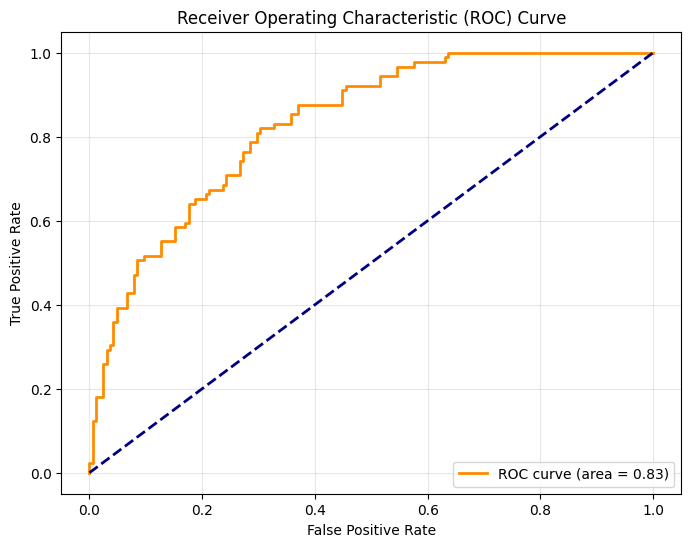

Computed AUC: 0.8311


In [98]:
from sklearn.metrics import roc_curve, roc_auc_score


y_probs = log_reg.predict_proba(X_holdout_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_holdout, y_probs)
auc_value = roc_auc_score(y_holdout, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"Computed AUC: {auc_value:.4f}")

#### 2.7 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). Feed you scaled X train and y train data.

In [105]:
cv_accuracies = cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv=10, scoring='accuracy')

print(f"all 10 accuracies: ", cv_accuracies)
print(f"overall mean accuracy: ", cv_accuracies.mean())
print(f"standard deviation: ", cv_accuracies.std())

all 10 accuracies:  [0.69230769 0.82692308 0.78846154 0.73076923 0.70588235 0.76470588
 0.88235294 0.7254902  0.7254902  0.80392157]
overall mean accuracy:  0.764630467571644
standard deviation:  0.05722158340888853


### 3. Use Decision tree classification model to make predictions and evaluate it with above developed functions. Draw ROC curve and compute AUC. Perform k-fold cross-validation.

#### 3.1 Create classification tree object, fit model and generate predictions

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=17)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_holdout_scaled)

#### 3.2 Evaluate created model with above functions

In [ ]:
print(f"accuracy:  {calculate_accuracy(y_holdout, y_pred_tree):.4f}")
print(f"precision: {calculate_precision(y_holdout, y_pred_tree):.4f}")
print(f"recall:    {calculate_recall(y_holdout, y_pred_tree):.4f}")
print(f"f1 score:  {calculate_f1(y_holdout, y_pred_tree):.4f}")

accuracy:  0.7756
precision: 0.6667
recall:    0.7191
f1 Score:  0.6919


#### 3.3 Draw a ROC curve and compute Area Under the Curve (AUC)

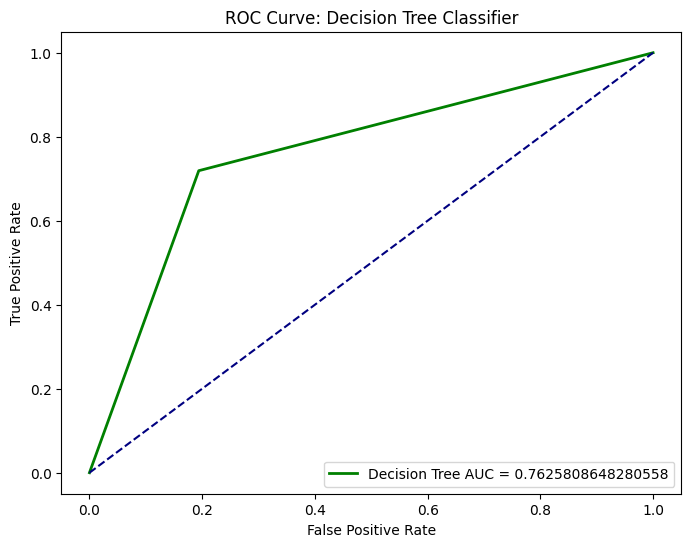

Decision Tree AUC: 0.7625808648280558


In [115]:

y_probs_tree = tree_model.predict_proba(X_holdout_scaled)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(y_holdout, y_probs_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)


plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree AUC = {roc_auc_tree}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

print(f"Decision Tree AUC: {roc_auc_tree}")

#### 3.4 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

In [ ]:
tree_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=17), X_train_scaled, y_train, cv=10, scoring='accuracy')

print(f"all 10 accuracies: {tree_cv_scores}")
print(f"mean accuracy: {tree_cv_scores.mean()}")
print(f"standard deviation: {tree_cv_scores.std()}")

All 10 CV Accuracies: [0.65384615 0.75       0.75       0.71153846 0.68627451 0.68627451
 0.90196078 0.60784314 0.74509804 0.76470588]
Mean CV Accuracy: 0.7257541478129713
Standard Deviation: 0.07517250865828227


#### 3.5 Make conclusions

logistic regression have higher AUC of compared to the decision tree 0.7626. logistic regression mean accuracy (~0.77) was more robust than the decision tree 0.7257, making it more reliable for predicting outcomes in new, unseen patients.